# **Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!**
# **This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.**
# Explore and analyze the data to discover important factors that govern the bookings.

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf
%matplotlib inline 

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/Hotel Bookings.csv')

Preliminary Survey 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
df['company'].unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

In [ ]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B', nan],
      dtype=object)

In [ ]:
#Creating copy of data frame 
dfcopy = df.copy()

# Cleaning of data 

In [ ]:
#To find duplicate rows and eliminate them 
dfcopy[dfcopy.duplicated()].shape

(31994, 32)

In [ ]:
dfcopy.drop_duplicates(inplace = True )

In [ ]:
#finding null values 
dfcopy.isna().sum().sort_values(ascending = False )

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


Columns of company and agent have missing  values because customer adopted booking by them selves. So replacing this missing values by appropiate value '0'.

In [ ]:
dfcopy['company'].fillna(0,inplace = True)
dfcopy['agent'].fillna(0,inplace = True)

In [ ]:
dfcopy['children'].fillna(dfcopy['children'].mean(), inplace = True)

In [ ]:
dfcopy['country'].fillna('others',inplace = True)
dfcopy['country']

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 87396, dtype: object

Addition of columns Adult , Children,Babies makes addtion zero which is no use so removing this columns.

In [ ]:
dfcopy[dfcopy['adults'] + dfcopy['children'] + dfcopy['babies'] == 0 ].shape

(151, 32)

In [ ]:
dfcopy.drop(dfcopy[dfcopy['adults'] + dfcopy['children'] + dfcopy['babies'] == 0].index,inplace =True)

coverting columns to appropiate type. 

In [ ]:
dfcopy['reservation_status_date'] = pd.to_datetime(dfcopy['reservation_status_date'], format = '%Y-%m-%d')

In [ ]:
dfcopy['children'].astype('int64').inplace = True

In [ ]:
dfcopy['company'].astype('int64').inplace = True
dfcopy['children'].astype('int64').inplace = True
dfcopy['agent'].astype('int64').inplace = True

Creating New Columns 

In [ ]:
dfcopy['total_stay'] = dfcopy['stays_in_weekend_nights']  + dfcopy['stays_in_week_nights']

In [ ]:
dfcopy['total_persons'] = dfcopy['adults'] + dfcopy['children'] + dfcopy['babies']

# Analysis

1) Preferred Hotel Type ?

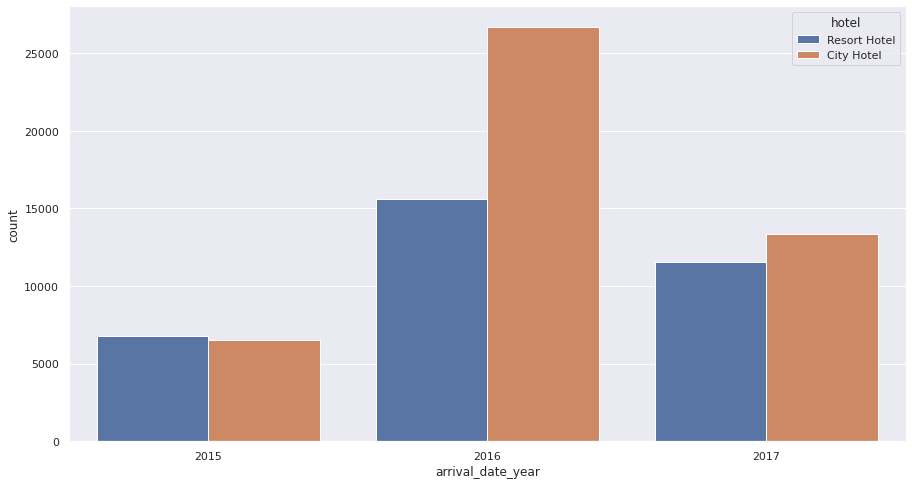

In [ ]:
# Year wise analysis
sns.set(rc={'figure.figsize':(15,8)})
sns.set(font_scale = 1)
sns.countplot(x = 'arrival_date_year', hue = 'hotel', data = dfcopy)
sns.set_style('darkgrid')
plt.show()


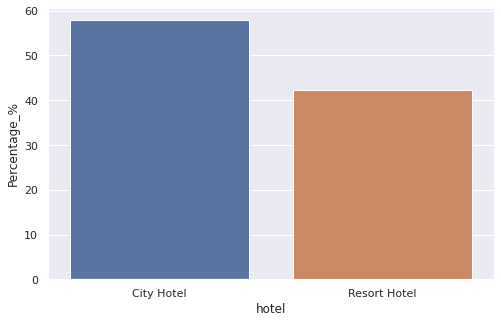

In [ ]:
#Percentage wise hotel preference's
hotel_group = dfcopy.groupby('hotel')
h1 = pd.DataFrame((hotel_group.size()/dfcopy.shape[0])*100).reset_index().rename(columns = {0:'Percentage_%'})     
plt.figure(figsize = (8,5))
sns.barplot(x = h1['hotel'], y = h1['Percentage_%'] )
plt.show()

First graph shows **city hotel** gets comparatively higher counts of bookings in year of 2016,2017.
The second graph shows comparison between relative precentage of hotel type which clearly shows the most preferred type of hotel is **City  Hotel**

2) which month gets highest booking ?

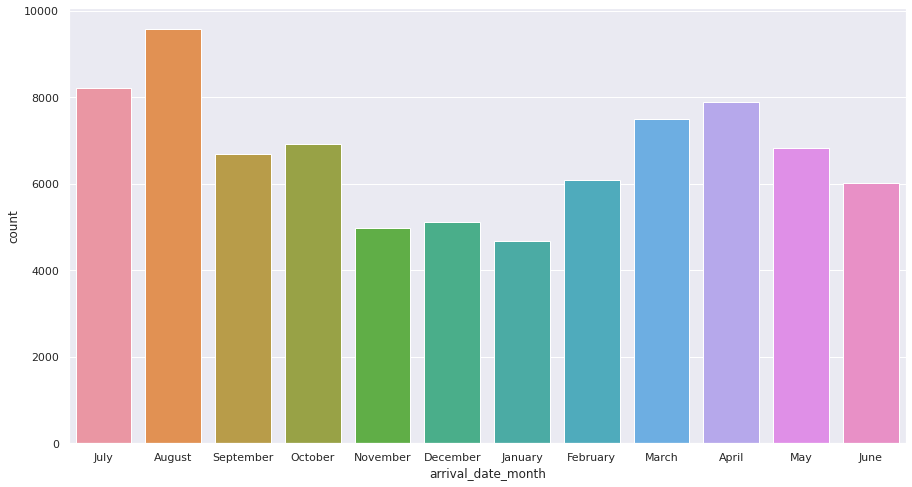

In [ ]:
sns.countplot(x= 'arrival_date_month', data = dfcopy)

Above plot shows the most seek top 3 month for hotel booking is August, July, April 

3) From Which countries most of these are customer are visiting from ? 

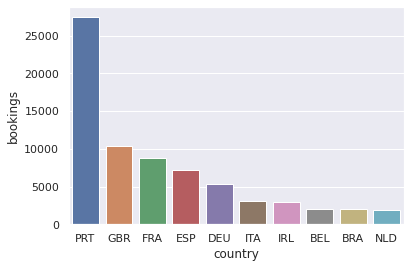

In [ ]:
grp_country = dfcopy.groupby('country')
temp = pd.DataFrame(grp_country.size()).rename(columns = {0:'bookings'}).sort_values('bookings', ascending = False)
temp = temp[:10]
sns.barplot(x = temp.index, y = temp['bookings'])
plt.show()

This chart shows that the most customers came from Portugal followed by Great Britan and spain 

4) Which market segment gave highest bookings ? 

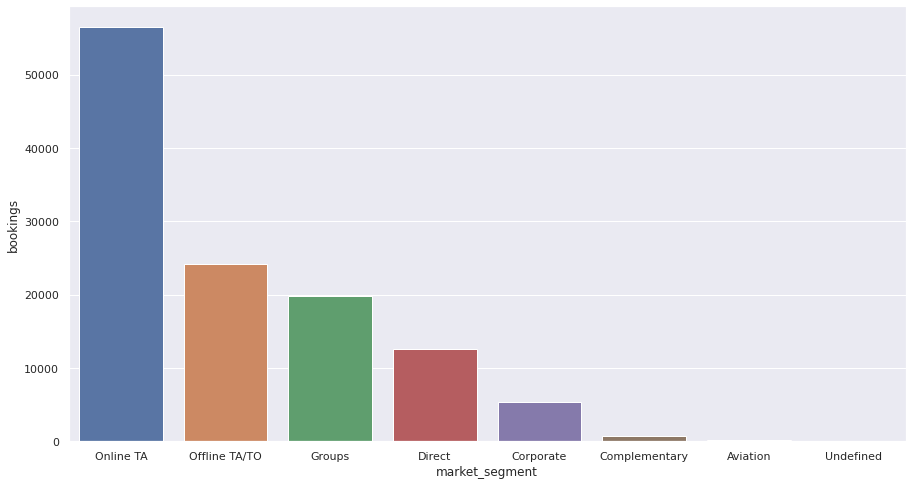

In [ ]:
grp_country = dfcopy.groupby('market_segment')
temp = pd.DataFrame(grp_country.size()).rename(columns = {0:'bookings'}).sort_values('bookings', ascending = False)
sns.barplot(x = temp.index, y = temp['bookings'])
sns.set(rc={'figure.figsize':(35,8)})
plt.show()

This shows Online Target advertising gets more booking in large than any other advertising segment

5) Which room generates highest ADR?

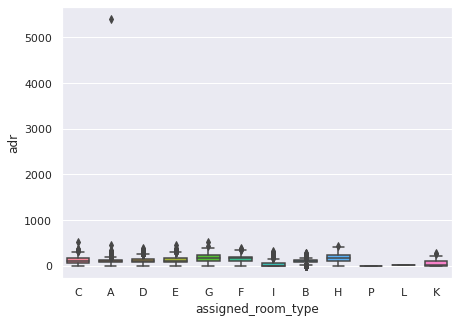

In [ ]:
sns.set(rc={'figure.figsize':(7,5)})
sns.boxplot( x = dfcopy['assigned_room_type'], y = dfcopy['adr'],saturation=1, width=0.7)
plt.show()

Room type H,G,C provides Good adr so hotel owner can increase this type of room. 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

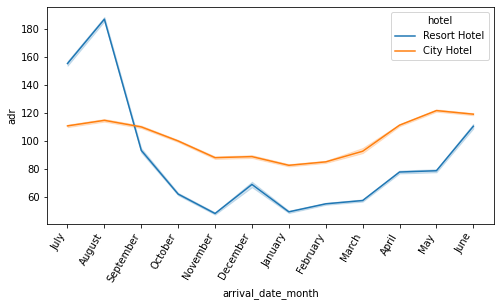

In [ ]:
# Monthwise ADR analysis
plt.figure(figsize=(8,4))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= dfcopy)
plt.xticks(
    rotation=60,
    horizontalalignment='right',
)

Thorughtout year City Hotel generates Stable adr but in case of Resort Hotel the ADR generation is high in month of August but got low in mid year.

6) Percentage of cancellation ? 

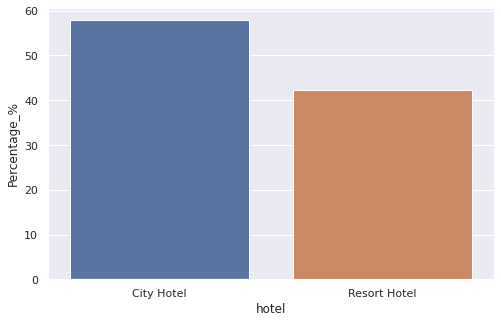

In [ ]:
grp = dfcopy.groupby('hotel')['is_canceled']
h2 = pd.DataFrame((grp.size()/dfcopy.shape[0])*100).reset_index().rename(columns = {0:'Percentage_%'})     
plt.figure(figsize = (8,5))
sns.barplot(x = h1['hotel'], y = h1['Percentage_%'] )
plt.show()

This data shows more than 50% city hotel gets cancelled, and more than 30% Resort Hotel get cancelled

7) which hotel type shows most percentage of repeat of customer ?

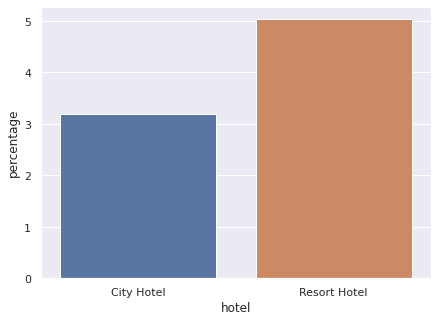

In [ ]:
rep = dfcopy[dfcopy['is_repeated_guest'] == 1]
rep_grp = rep.groupby('hotel')
D1 = pd.DataFrame(rep_grp.size()).rename(columns = {0:'repeated_guest'})

grouped_by_hotel = dfcopy.groupby('hotel')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)


D3['percentage'] = round((D3['repeated_guest']/D3['total_bookings'])*100,2)

sns.barplot(x = D3.index, y = D3['percentage'])
plt.show()

Resort hotel has high precentage of repeated customer than city hotel.

# **SUMMARY**
The hotel booking analysis was done by 5 members- Amitha K , Abhishek P Sadawarte , Aman Singh , Mohd Khalid and Shashank Kumar Yadav.

We selected Hotel Booking Analysis as our Capstone Project because we thought this topic may provide us new information about Hotel Industry which might be also usefull to hotel owners.

In this project we got one CSV file containing data about hotel bookings.

In first as we started project we faced lot of confusion about project and how to do it because this was our first project. So we started referring older project for guidance. We also discussed withinourselves and worked some ideas that which question we might want to answer from given data to get proper idea of how hotel indsutries bookings, costings, cancellation varies during whole season or given period.

So during the process we studied various projects and we got the idea of how to move forward with the project so individually we started or project and then the next hurdle we come across was how to tackle with so many missing values specially in columns like "company" , "agent" , "country" , "children", so we tackled it properly.

Children column contains the count of children, so we replaced all the missing values with the rounded mean value. And our country column contains country codes representing different countries. It is a categorical feature so we replaced it with the mode value. The mode value is the value that appears more than any other value. So, in this case, we replaced it with the country that appears the most often. We can see different data types for different columns.

After cleaning all the data we get to know full perview of data and now we can tackle questions for which we want to know answers. For guidance we also searched previoius EDA projects that what might be right questions that need to be answered. So we selected few question likw which type of hotel customer preferr ? what is monthwise avg ADR ? what is roomwise ADR ? from which country the most customer came? which type of hotel type get most repeated customer?
and we tried to answer it on above analysis.


# **Conclusion**
1) City hotel type gets most reservation throughout the season.     
2) August, July, April got most reservation in year.     
3) The most of the customer came from Portugal, followed by Spain and Great Britan        
4) Room type H,G,C provides good ADR    
5) Thorughtout year City Hotel generates Stable adr but in case of Resort Hotel the ADR generation is high in month of August but got low in mid year.  
6) More than 50% of city hotel gets cancelled and more than 30% resort hotel gets cancelled.          
7) Resort Type of hotel gets high repeated customer.        
8) Online TA segment gets more booking. 

